## Boston House Price Predection

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('data//housing.data', delim_whitespace = True, header = None)

In [57]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48,22.00


### Column name and description from Kaggle.com.

- CRIM: per capita crime rate by town 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS: proportion of non-retail business acres per town 
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX: nitric oxides concentration (parts per 10 million) 
- RM: average number of rooms per dwelling 
- AGE: proportion of owner-occupied units built prior to 1940 
- DIS: weighted distances to five Boston employment centres 
- RAD: index of accessibility to radial highways 
- TAX: full-value property-tax rate per \$10,000 
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT: \% lower status of the population 
- MEDV: Median value of owner-occupied homes in \$1000's

In [58]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'];
df.columns = col_names

In [59]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48,22.00


### Exploratory Data Analysis EDA

In [60]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


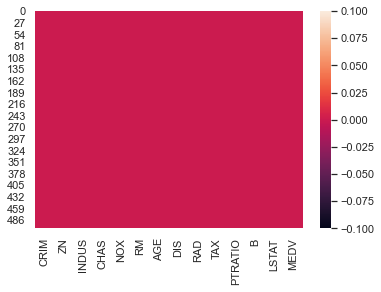

In [61]:
sns.heatmap(df.isnull())

Looking at statistical figures from the data we can analysis following points.
- CRIM has min ,25%, 50%, 75% with in range but max is very high, the data is very noisi and there could be possible outlier. This is the probable reason why the standard deviation is very high. (When standard deviation is very high, it will make model unpredictable). If we ae able to find the outlier for this data we can remove that row or rows to fine tune the data.
- Similarly std is high for zn, if you look at the percentile distirbution for zn it is starting to increase from 75% and max is very high.
- If we look at the min values of column specially CHAS and TAX it is almost multiple of 10K. Small change in tax can affect the CHAS very high so we need to engineer these data before fitting into the model.


In [62]:
##sns.pairplot(df, height=1.5)

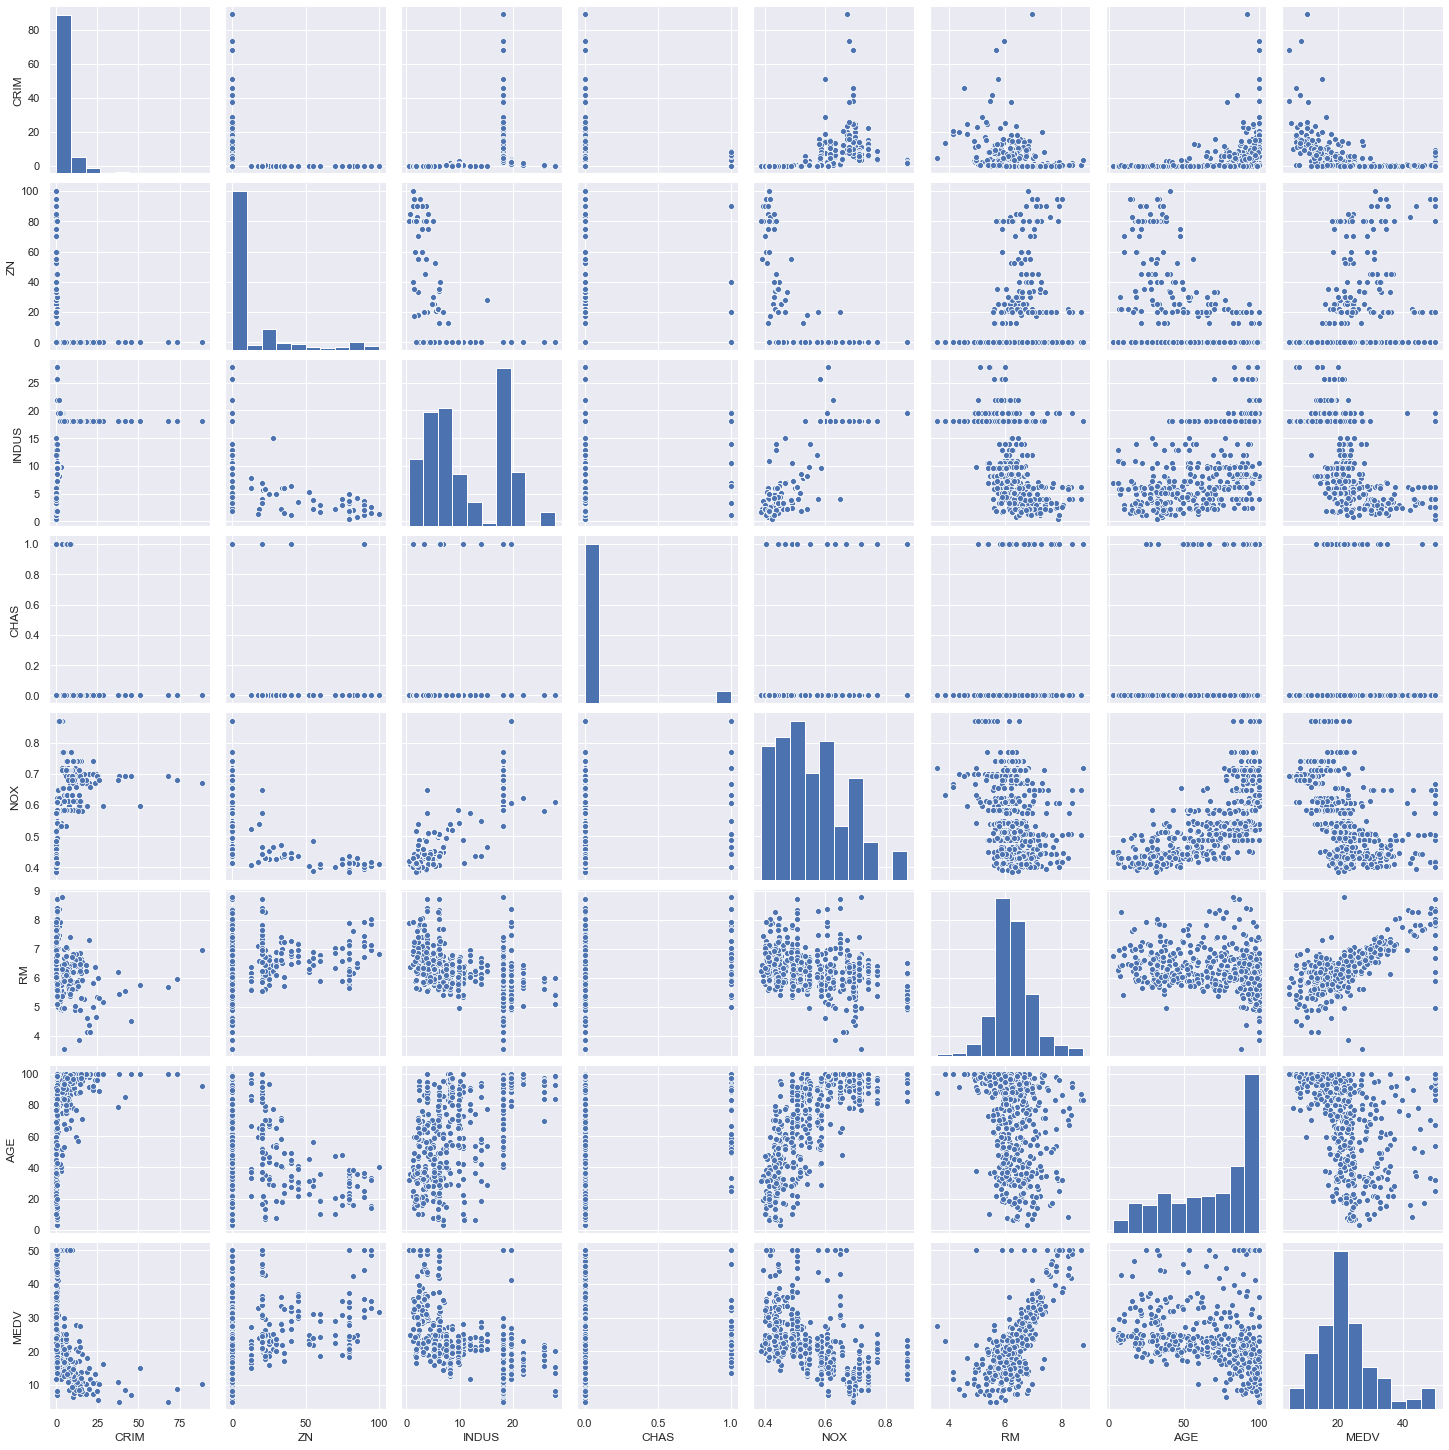

In [63]:
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE','MEDV']], height = 2.5)

In [ ]:
sns.pairplot(df[[ 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']], height = 2.5)

### Correlation coefficient - Analysis and feature selection

Correlation coefficient -1<r<1 defines how closely two parameters are related to each other. -1 and 1 is heighest proportionality -1 being inversely proportional and 1 being directly proportional. If we have two features with high corr we need to avoid one. If we use both features to train the model it will decrease the accuracy of the model. (Why?)
But if the feature have high corr with the target data it will highly increase the accuracy of the prediction.

If you are interested in Corr calculation referr the following link.
https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/correlation-coefficient-r/v/calculating-correlation-coefficient-r

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Sckit Learn: Five steps of model training.

In [ ]:
np.array([15]).reshape(-1,1)

In [ ]:
#step 1: Select the library
from sklearn.linear_model import LinearRegression

#step 2: Select the model
model = LinearRegression()

#step 3: Prepare training data
x = df['RM'].values.reshape(-1,1)
y = df['MEDV']

#step 4: Fit the data to model and train the model
model.fit(x,y)

#step 5: Predection
model.predict(np.array([6.5]).reshape(-1,1))

In [ ]:
plt.figure(figsize=[12,10])
sns.regplot(x,y)
plt.xlabel("Number of Room")
plt.show()

### Robust Regression

Robust regression has algorithm to identify the outlier and inlier and based on that data it will perform the regression.

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
from numpy import inf

In [ ]:
ransac = RANSACRegressor()
ransac.fit(x,y)

In [ ]:
RANSACRegressor(base_estimator =None, is_data_valid=None, is_model_valid = None,
               loss='absolute_loss', max_skips=inf, max_trials= 100,
               min_samples=None, random_state=None, residual_threshold = None,
               stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


In [ ]:
np.arange(3, 10, 1)

In [ ]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

In [ ]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(x[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [ ]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV']
ransac = RANSACRegressor()
ransac.fit(x,y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 40, 2)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(x[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


### Model training.

Now based on above analysis and Regression ideas lets complete this project. I am going to use two features to train the data RM and LSTAT since the correlation coefficient was was hight in regards to MDEV.

In [ ]:
from sklearn.model_selection import train_test_split

X =  pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Now lets do same analysis with more features


In [ ]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['PTRATIO'], df['TAX'], df['RAD']], 
                 columns = ['LSTAT','RM','PTRATIO', 'TAX', 'RAD'])
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

## Accuracy Analysis


### Root Mean square error: 

Lesser the RMSE more accurate is the model

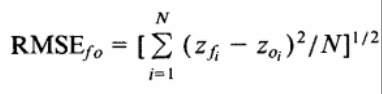

### Coefficient of determination: R2 Score

Higher the R2 score more accurate is the model

r2 = 1- SSR/SST (ssr = sum of square of residual, sst = sum of total)

sample= [(1,1),(2,2),(3,4)]

y = (1,2,3) 

y-pred = (1,2,4)

y-res = (0,0,-1)